In [1]:
# Here we are importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_auc_score,f1_score
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Here we are importing the csv file
df = pd.read_csv("fraud_data.csv")

In [5]:
# Here we are seeing the head of the dataset one thing that I have noticed is that fraud is denoted by 1 and 0 so we may not need binarylabelizer
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,4/1/2019 0:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,4/1/2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,4/1/2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,4/1/2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,4/1/2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [9]:
# Here we are seeing bottom of the dataset
df.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",1/9/1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",9/11/1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [11]:
# Here we are seeing the info for the dataset
df.info

<bound method DataFrame.info of       trans_date_trans_time                          merchant        category  \
0             4/1/2019 0:58  "Stokes, Christiansen and Sipes"     grocery_net   
1            4/1/2019 15:06                      Predovic Inc    shopping_net   
2            4/1/2019 22:37                   Wisozk and Sons        misc_pos   
3            4/1/2019 23:06                    Murray-Smitham     grocery_pos   
4            4/1/2019 23:59                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441      22-01-2019 00:37                      Hudson-Grady    shopping_pos   
14442      22-01-2019 00:41    "Nienow, Ankunding and Collie"        misc_pos   
14443      22-01-2019 00:42                  Pacocha-O'Reilly     grocery_pos   
14444      22-01-2019 00:48     "Bins, Balistreri and Beatty"    shopping_pos   
14445      22-01-2019 00:55                Daugherty-Thompson     food_dining

In [13]:
# Here we are seeing the describe function of the dataset for gaining insights into the characteristics of a dataset. It provides a concise summary of the central tendency, dispersion, and shape of a dataset's distribution.
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [15]:
# Here we are seeing the column names of the dataset
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
# Here we are seeing the numeric functions which are useful for our further study
df_num = df[['amt','lat','long','merch_lat','merch_long','is_fraud','trans_num']]

In [19]:
# Here we seeing the correlation between the numeric values of the data set
df_num.corr

<bound method DataFrame.corr of           amt      lat      long  merch_lat  merch_long is_fraud  \
0       14.37  64.7556 -165.6723  65.654142 -164.722603        1   
1      966.11  64.7556 -165.6723  65.468863 -165.473127        1   
2       49.61  64.7556 -165.6723  65.347667 -165.914542        1   
3      295.26  64.7556 -165.6723  64.445035 -166.080207        1   
4       18.17  64.7556 -165.6723  65.447094 -165.446843        1   
...       ...      ...       ...        ...         ...      ...   
14441  122.00  45.8289 -118.4971  46.442439 -118.524214        0   
14442    9.07  43.7857 -124.1437  42.901265 -124.995317        0   
14443  104.84  44.6873 -104.4414  45.538062 -104.542117        0   
14444  268.16  64.7556 -165.6723  64.081462 -165.898698        0   
14445   50.09  40.4815  -92.9951  40.387243  -92.224871        0   

                              trans_num  
0      a3806e984cec6ac0096d8184c64ad3a1  
1      a59185fe1b9ccf21323f581d7477573f  
2      86ba3a888b42cd3925

In [21]:
# Here we are seeing the variance of the dataset
df_num.var

<bound method DataFrame.var of           amt      lat      long  merch_lat  merch_long is_fraud  \
0       14.37  64.7556 -165.6723  65.654142 -164.722603        1   
1      966.11  64.7556 -165.6723  65.468863 -165.473127        1   
2       49.61  64.7556 -165.6723  65.347667 -165.914542        1   
3      295.26  64.7556 -165.6723  64.445035 -166.080207        1   
4       18.17  64.7556 -165.6723  65.447094 -165.446843        1   
...       ...      ...       ...        ...         ...      ...   
14441  122.00  45.8289 -118.4971  46.442439 -118.524214        0   
14442    9.07  43.7857 -124.1437  42.901265 -124.995317        0   
14443  104.84  44.6873 -104.4414  45.538062 -104.542117        0   
14444  268.16  64.7556 -165.6723  64.081462 -165.898698        0   
14445   50.09  40.4815  -92.9951  40.387243  -92.224871        0   

                              trans_num  
0      a3806e984cec6ac0096d8184c64ad3a1  
1      a59185fe1b9ccf21323f581d7477573f  
2      86ba3a888b42cd39258

<Axes: >

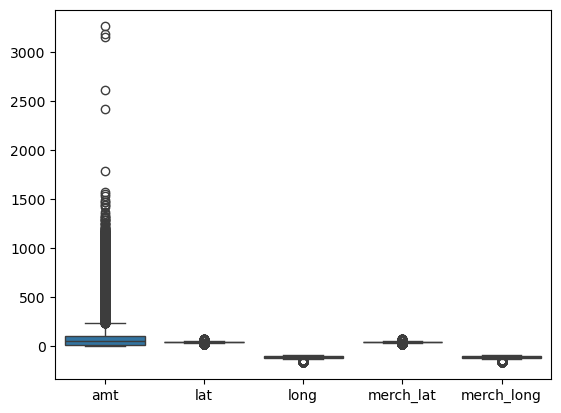

In [23]:
# Here we are seeing the boxplot of df_num to see the outlairs
sns.boxplot(df_num)

<Axes: >

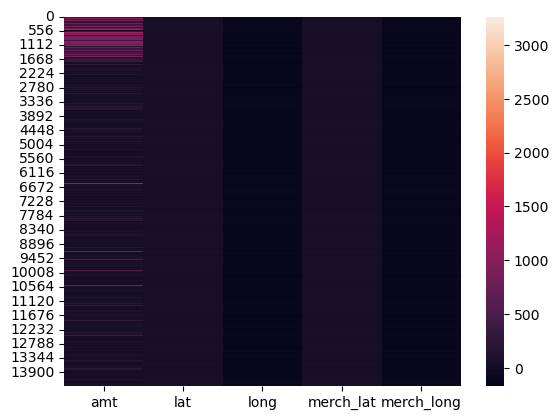

In [25]:
sns.heatmap(df[['amt','lat','long','merch_lat','merch_long']])

In [27]:
# Here we be assigning the X,y variables
X = df[['amt','lat','long','merch_lat','merch_long']]

In [29]:
y=df['is_fraud']

In [31]:
y_encoded = pd.factorize(y)

In [33]:
# Here we be doing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# Here we are sampling train size for x
X_train

,amt,lat,long,merch_lat,merch_long
13833,4.73,33.2887,-111.0985,33.722645,-110.121297
10359,34.67,38.5319,-93.9221,38.526250,-93.923462
13774,103.95,36.0434,-90.2907,36.899807,-89.561588
11334,82.84,38.6171,-90.4504,39.495595,-91.302621
13468,139.45,38.6865,-121.3494,37.783436,-121.127329
...,...,...,...,...,...
5191,2.22,37.3304,-121.7913,37.017828,-121.486519
13418,46.16,38.2911,-92.7059,38.036150,-93.064465
5390,47.33,39.8127,-120.6405,40.082104,-120.878583
860,269.64,47.6633,-122.3022,48.248724,-121.793531


In [39]:
# Here we are seeing the test size for y
X_test

,amt,lat,long,merch_lat,merch_long
6083,11.08,39.5994,-105.0044,38.819632,-105.456627
907,20.00,35.7206,-108.0271,35.191041,-108.255173
2859,62.93,34.9889,-106.0609,35.538630,-106.010585
11689,51.79,40.4542,-98.6538,40.496551,-99.317671
2715,2.50,33.8419,-117.6043,34.359970,-117.218742
...,...,...,...,...,...
11354,9.64,45.3099,-122.9685,45.012674,-123.390660
1210,738.30,33.9056,-118.0818,33.500179,-118.643236
4850,115.06,33.7467,-117.1721,34.106046,-116.964399
6843,5.14,20.0271,-155.3697,19.655465,-154.550590


In [41]:
y_test

6083     0
907      1
2859     0
11689    0
2715     0
        ..
11354    0
1210     1
4850     0
6843     0
2238     0
Name: is_fraud, Length: 2890, dtype: object

In [43]:
# Here we are assigning the model in model term
model = LogisticRegression()

In [45]:
# Here we have used the labelbin
y_encoded = pd.factorize(y)

In [49]:
# Here we will fit the model in training dataset
model.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# Here we are going to predict the X_test
y_pred = model.predict(X_test)

In [53]:
# We will now evalute the metrics which we have run in the beginning
# Here we are seeing the accuracy_score
accuracy_score(y_pred,y_test)

0.9204152249134948

In [55]:
# Here we seeing the confusion matrix
confusion_matrix(y_pred,y_test)

array([[2476,    1,  201],
       [   0,    0,    0],
       [  28,    0,  184]], dtype=int64)

In [59]:
f1_score(y_pred,y_test,average = "weighted")

0.9307330877313323